In [10]:
# https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/

In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

from common import read_workout_dfs

In [12]:
dfs = read_workout_dfs()

In [13]:
df_months = []
for year, df in dfs.items():
    df["month"] = df["WorkoutDay"].apply(lambda date: date.split("-")[1])
    df_month = df.groupby("month", as_index=False).agg({"TimeTotalInHours": "sum"})
    df_month["year"] = year
    df_months.append(df_month)

df_months = pd.concat(df_months)

In [14]:
df_months

,month,TimeTotalInHours,year
0,07,22.828056,2021
1,08,34.699167,2021
2,09,18.003056,2021
3,10,21.822250,2021
4,11,9.463797,2021
5,12,18.081609,2021
0,01,28.274697,2022
1,02,20.127636,2022
2,03,3.013200,2022
3,04,35.749550,2022


In [30]:
num_to_month = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

year = 2022
df_month_2023 = df_months[df_months["year"] == year]

ANGLES = list(reversed(np.linspace(0.05, 2 * np.pi - 0.05, len(df_month_2023), endpoint=False)))
LENGTHS = df_month_2023["TimeTotalInHours"].values
LABELS = [num_to_month[int(month)] for month in df_month_2023["month"].values]

In [31]:
GREY12 = "#1f1f1f"

# plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams.update({"text.color": GREY12})

plt.rc("axes", unicode_minus=False)

[Text(5.71791986491462, 0, 'Jan'),
 Text(5.202654422649655, 0, 'Feb'),
 Text(4.687388980384689, 0, 'Mar'),
 Text(4.172123538119724, 0, 'Apr'),
 Text(3.6568580958547585, 0, 'May'),
 Text(3.141592653589793, 0, 'Jun'),
 Text(2.6263272113248273, 0, 'Jul'),
 Text(2.111061769059862, 0, 'Aug'),
 Text(1.5957963267948967, 0, 'Sep'),
 Text(1.080530884529931, 0, 'Oct'),
 Text(0.5652654422649656, 0, 'Nov'),
 Text(0.05, 0, 'Dec')]

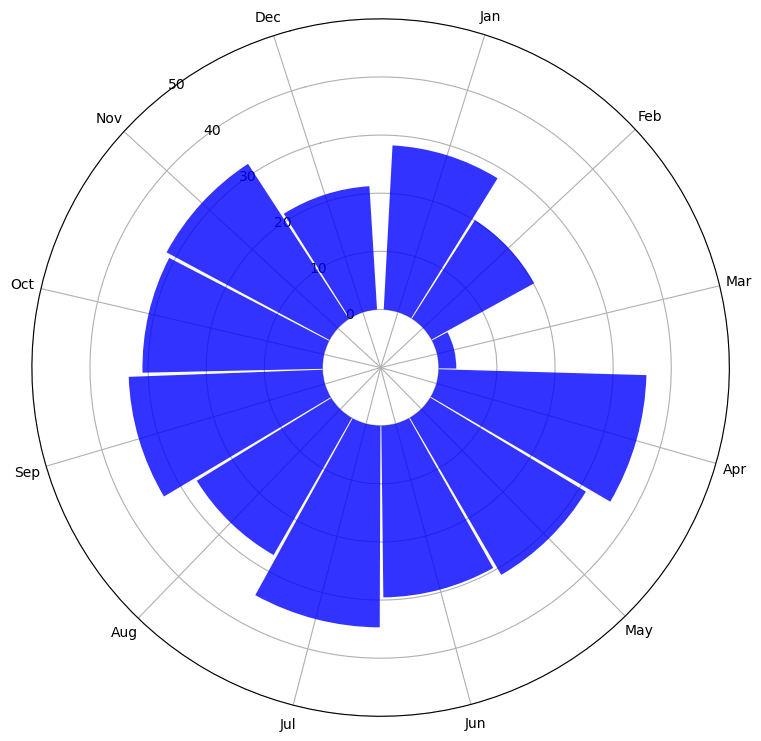

In [32]:
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(np.pi * 2 / 3 - np.pi / 12)
ax.set_ylim(-10, 50)

ax.bar(ANGLES, LENGTHS, alpha=0.8, width=0.5, color="blue", zorder=10)

ax.set_xticks(ANGLES)
ax.set_xticklabels(LABELS)

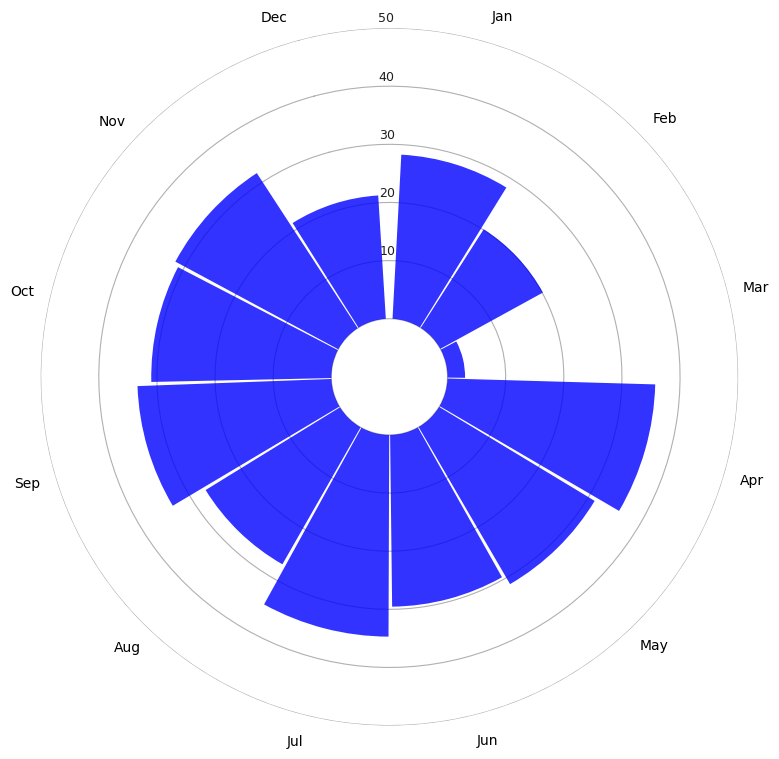

In [33]:
# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0, 10, 20, 30, 40, 50])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)


# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 1
ax.text(-0.16 * np.pi / 2, 10 + PAD, "10", ha="center", size=9)
ax.text(-0.16 * np.pi / 2, 20 + PAD, "20", ha="center", size=9)
ax.text(-0.16 * np.pi / 2, 30 + PAD, "30", ha="center", size=9)
ax.text(-0.16 * np.pi / 2, 40 + PAD, "40", ha="center", size=9)
ax.text(-0.16 * np.pi / 2, 50 + PAD, "50", ha="center", size=9)

# Add text to explain the meaning of the height of the bar and the
# height of the dot
# ax.text(ANGLES[0], 3100, "Cummulative Length [FT]", rotation=21, 
#         ha="center", va="center", size=10, zorder=12)
# ax.text(ANGLES[0]+ 0.012, 1300, "Mean Elevation Gain\n[FASL]", rotation=-69, 
#         ha="center", va="center", size=10, zorder=12)
fig